<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hierarchical Agglomerative Clustering

*Author: Kayvon Ghahremani*

*Updated: Stephen Coshatt*

**References:**


1.   https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
2.   https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering



### **Ward Linkage**
Ward is a method of linkage for Agglomerative Hierarchical Clustering where the distance between clusters is the sum of squared differences within all clusters.

In this method, all clusters are considered, and the algorithm computes the sum of squared distances within the clusters and merges them to minimize it. From a statistical viewpoint, the process of agglomeration leads to a reduction in the variance of each resulting cluster

Ward’s method, or minimal increase of sum-of-squares (MISSQ), sometimes incorrectly called "minimum variance" method. Proximity between two clusters is the magnitude by which the summed square in their joint cluster will be greater than the combined summed square in these two clusters: 𝑆𝑆_12 − (𝑆𝑆_1 + 𝑆𝑆_2). (Between two singleton objects this quantity = squared euclidean distance / 2.) The metaphor of this built of cluster is type. Intuitively, a type is a cloud more dense and more concentric towards its middle, whereas marginal points are few and could be scattered relatively freely. [2]

In [1]:
!pip install influxdb

     |████████████████████████████████| 77 kB 5.0 MB/s 


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


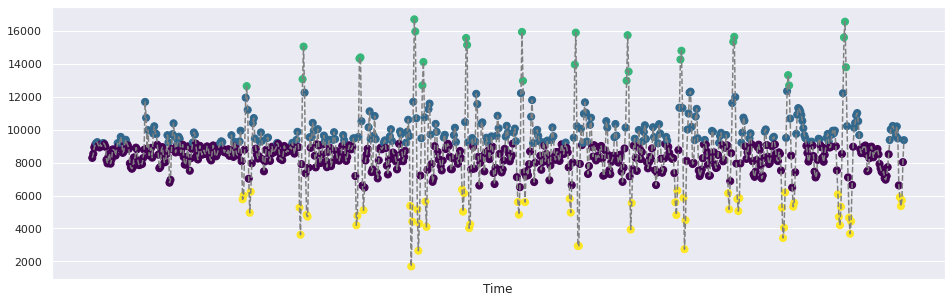

In [2]:
import csv
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp
import sklearn


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


ip = "sensorweb.us" 
unit = "b8:27:eb:76:15:20" # FloorB
stampIni = "2020-07-07T19:18:14.000Z" # UTC time = EST time + 4
stampEnd = "2020-07-07T19:18:22.000Z"
client = InfluxDBClient(ip, "8086", "test", "sensorweb", "shake",ssl=True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
times1 = np.array(list(times))
if(len(data) == 0):
  print("No data in the chosen time range!")
  quit()


# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=400, centers=4,
#                        cluster_std=0.60, random_state=0)
# X = X[:, ::-1] # flip axes for better plotting

# plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

n_clusters = 4

model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
model.fit(data.reshape(-1,1))
labels = model.labels_


fig = plt.figure(figsize=(16,5))
plt.plot(times1,data,'--',c='grey')
plt.scatter(times1, data, s=50, c=labels, cmap='viridis')#matplotlib.colors.ListedColormap(colors))
plt.xticks([],rotation=45)
plt.xlabel('Time')
plt.show()

### **Complete Linkage**

Complete is another method of linkage for Agglomerative Hierarchical Clustering where the distance between two clusters is the longest distance between two points in each cluster.

For each pair of clusters, the algorithm computes and merges them to minimize the maximum distance between the clusters (in other words, the distance of the farthest elements)

Since the proximity between two clusters is the proximity between their two most distant objects, this value is one of values of the input matrix. The metaphor of this built of cluster is circle (in the sense, by hobby or plot) where two most distant from each other members cannot be much more dissimilar than other quite dissimilar pairs (as in circle). Such clusters are "compact" contours by their borders, but they are not necessarily compact inside.

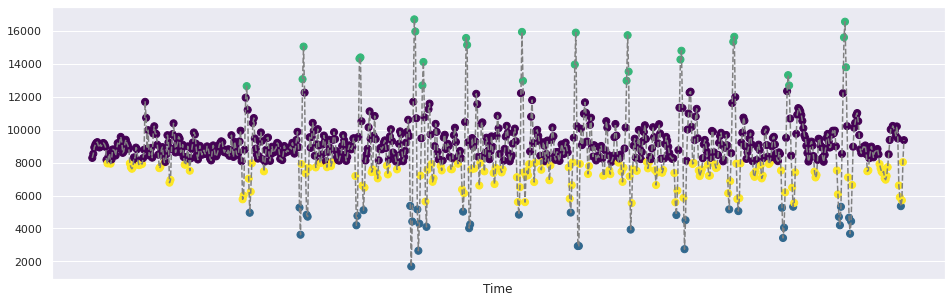

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=400, centers=4,
#                        cluster_std=0.60, random_state=0)
# X = X[:, ::-1] # flip axes for better plotting

# plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

n_clusters = 4

model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
model.fit(data.reshape(-1,1))
labels = model.labels_


fig = plt.figure(figsize=(16,5))
plt.plot(times1,data,'--',c='grey')
plt.scatter(times1, data, s=50, c=labels, cmap='viridis')
plt.xticks([],rotation=45)
plt.xlabel('Time')
plt.show()

### **Single Linkage**
Single linkage is a method of linkage for Agglomerative Hierarchical Clustering where the distance between two clusters is the shortest distance between two points in each cluster. Proximity between two clusters is the proximity between their two closest objects.

Two most dissimilar cluster members can happen to be very much dissimilar in comparison to two most similar. Single linkage method controls only nearest neighbours similarity.

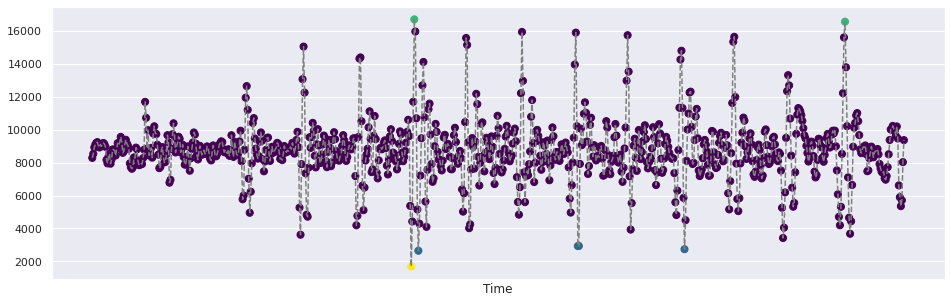

In [4]:
n_clusters = 4
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')
model.fit(data.reshape(-1,1))
labels = model.labels_


fig = plt.figure(figsize=(16,5))
plt.plot(times1,data,'--',c='grey')
plt.scatter(times1, data, s=50, c=labels, cmap='viridis')
plt.xticks([],rotation=45)
plt.xlabel('Time')
plt.show()

### **Average Linkage**
The distance between clusters is the average distance between each point in one cluster to every point in other cluster. 

Proximity between two clusters is the arithmetic mean of all the proximities between the objects of one, on one side, and the objects of the other, on the other side; while the subclusters of which each of these two clusters were merged recently have equalized influence on that proximity – even if the subclusters differed in the number of objects.

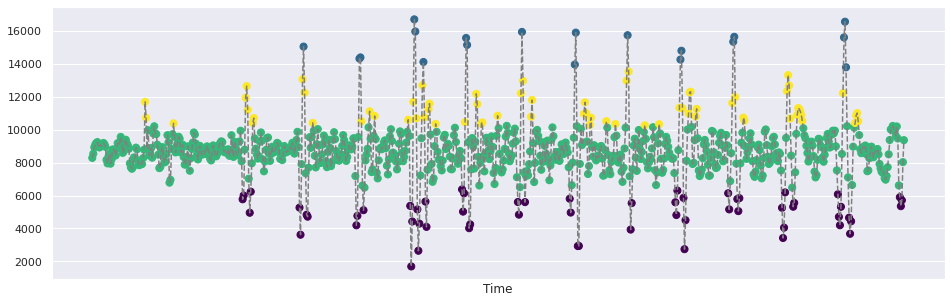

In [5]:
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
model.fit(data.reshape(-1,1))
labels = model.labels_


fig = plt.figure(figsize=(16,5))
plt.plot(times1,data,'--',c='grey')
plt.scatter(times1, data, s=50, c=labels, cmap='viridis')
plt.xticks([],rotation=45)
plt.xlabel('Time')
plt.show()